In [1]:
# Import packages

# Regression Models
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from collections import Counter
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [2]:
df = pd.read_csv('pollution.csv', engine='pyarrow')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [7]:
df.rename(columns={'No':'no', 'pm2.5':'concentration', 'DEWP':'dew_point', 'TEMP':'temperature', 
                   'PRES':'pressure', 'cbwd':'combined_wind_direction', 'Iws':'cumulated_wind_speed', 
                   'Is':'cumulated_hours_of_snow', 'Ir':'cumulated_hours_of_rain'}, inplace=True)

In [9]:
# Check for duplicates
df['no'].duplicated().sum() 

0

In [10]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")

missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (43824, 13)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['no', 'year', 'month', 'day', 'hour', 'concentration', 'dew_point', 'temperature', 'pressure', 'combined_wind_direction', 'cumulated_wind_speed', 'cumulated_hours_of_snow', 'cumulated_hours_of_rain']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no                       43824 non-null  int64  
 1   year                     43824 non-null  int64  
 2   month       

In [13]:
df.dropna(subset=['concentration'], inplace=True)

In [17]:
df.reset_index(drop=True, inplace=True)

In [11]:
df['concentration'].mean()

98.61321455085375

In [19]:
df.head()

,no,year,month,day,hour,concentration,dew_point,temperature,pressure,combined_wind_direction,cumulated_wind_speed,cumulated_hours_of_snow,cumulated_hours_of_rain
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [20]:
df.shape

(41757, 13)

In [54]:
df.drop(columns=['no'], axis=1, inplace=True)

In [38]:
#df[df['year'] == 2014]

In [55]:
# filter by year
y_2010 = df[df['year'] == 2010]
y_2011 = df[df['year'] == 2011]
y_2012 = df[df['year'] == 2012]
y_2013 = df[df['year'] == 2013]
y_2014 = df[df['year'] == 2014]

In [56]:
y_2010.head(3)

,year,month,day,hour,concentration,dew_point,temperature,pressure,combined_wind_direction,cumulated_wind_speed,cumulated_hours_of_snow,cumulated_hours_of_rain
0,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0


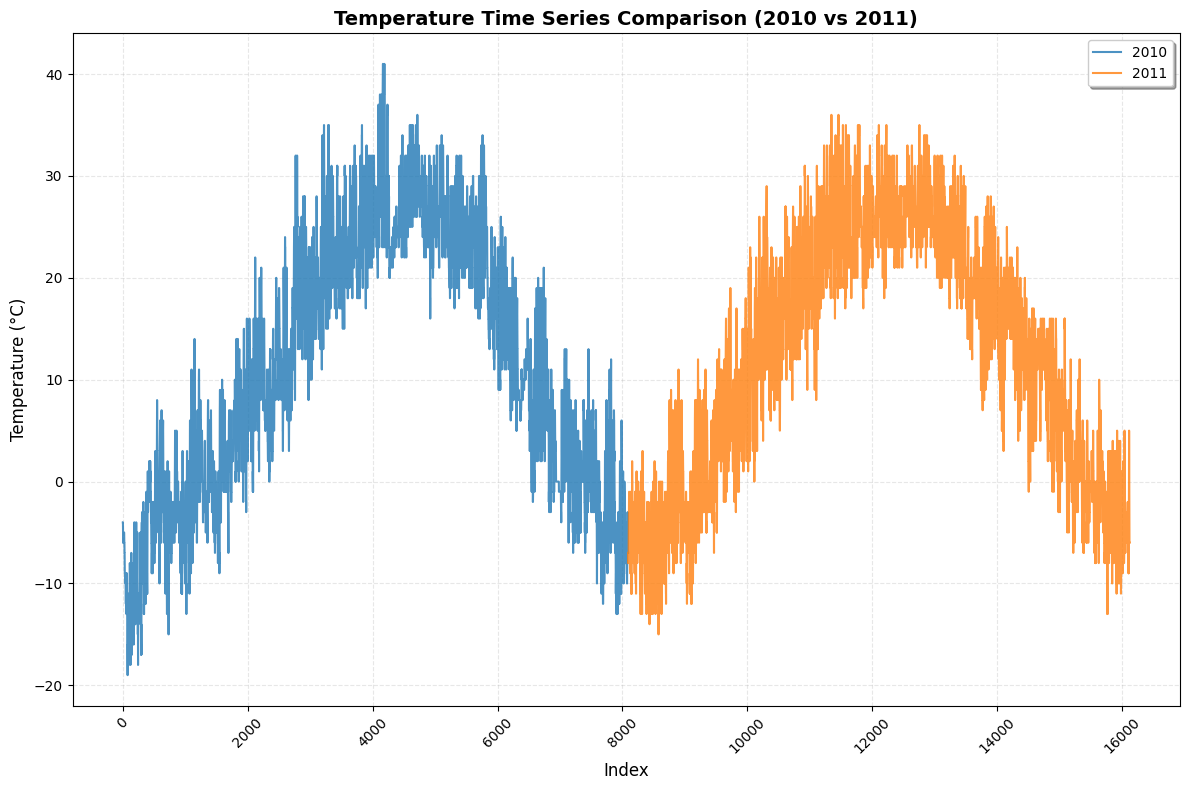

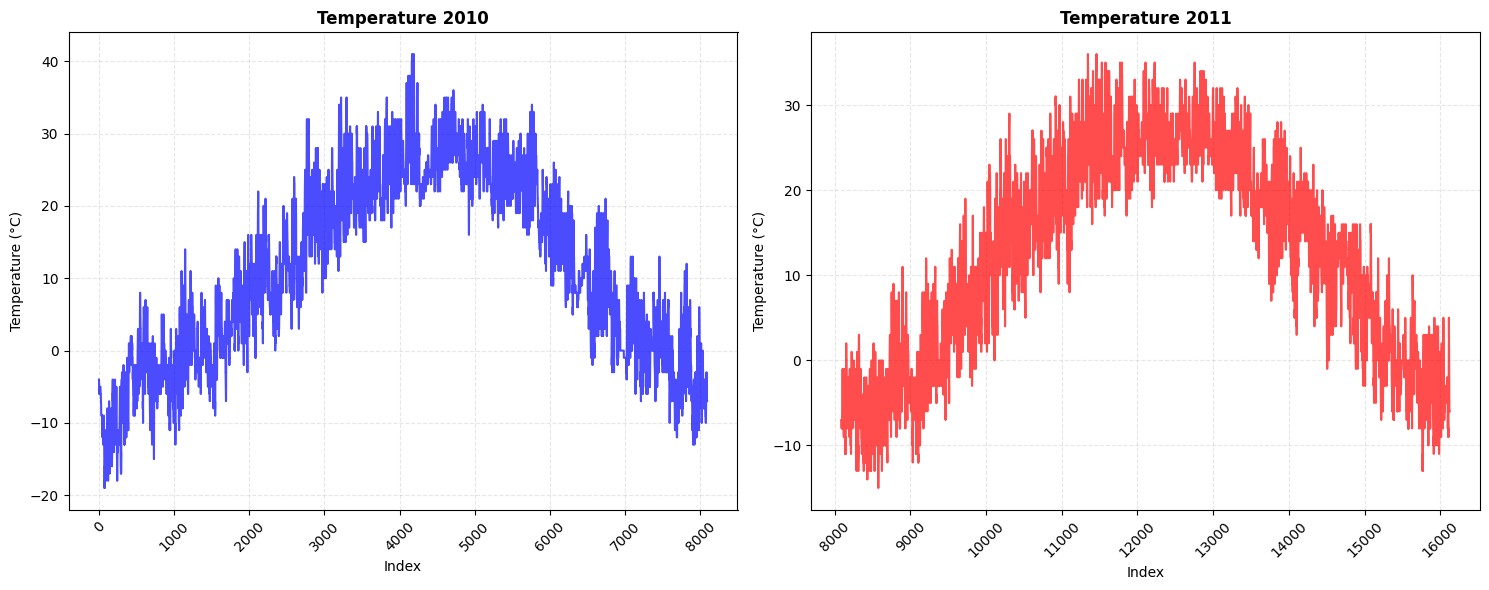

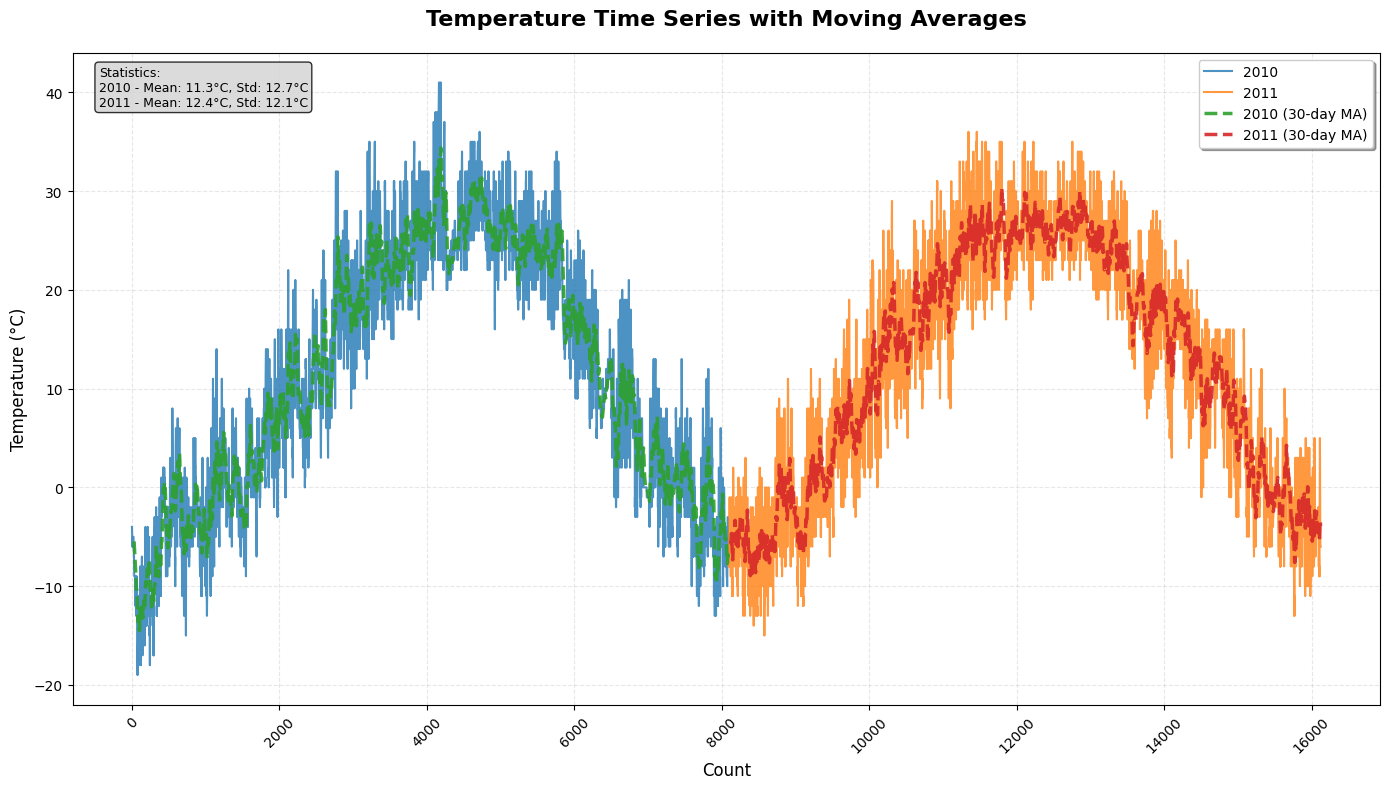

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the data
plt.plot(y_2010.index, y_2010['temperature'], linewidth=1.5, label='2010', alpha=0.8)
plt.plot(y_2011.index, y_2011['temperature'], linewidth=1.5, label='2011', alpha=0.8)

# Improve the plot appearance
plt.title('Temperature Time Series Comparison (2010 vs 2011)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Better x-axis formatting
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Proper legend
plt.legend(loc='upper right', frameon=True, shadow=True)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Alternative: Side-by-side subplots for better comparison
plt.figure(figsize=(15, 6))

# First subplot - 2010
plt.subplot(1, 2, 1)
plt.plot(y_2010.index, y_2010['temperature'], linewidth=1.5, color='blue', alpha=0.7)
plt.title('Temperature 2010', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Second subplot - 2011
plt.subplot(1, 2, 2)
plt.plot(y_2011.index, y_2011['temperature'], linewidth=1.5, color='red', alpha=0.7)
plt.title('Temperature 2011', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Advanced version with statistics
plt.figure(figsize=(14, 8))

# Main plot
plt.plot(y_2010.index, y_2010['temperature'], linewidth=1.5, label='2010', alpha=0.8)
plt.plot(y_2011.index, y_2011['temperature'], linewidth=1.5, label='2011', alpha=0.8)

# Add moving averages for trend visualization
window_size = 30  # 30-day moving average
if len(y_2010) >= window_size:
    ma_2010 = y_2010['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2010.index, ma_2010, linewidth=2.5, linestyle='--', 
             label='2010 (30-day MA)', alpha=0.9)

if len(y_2011) >= window_size:
    ma_2011 = y_2011['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2011.index, ma_2011, linewidth=2.5, linestyle='--', 
             label='2011 (30-day MA)', alpha=0.9)

# Enhanced styling
plt.title('Temperature Time Series with Moving Averages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper right', frameon=True, shadow=True, fontsize=10)

# Add statistical info as text
stats_text = f"""Statistics:
2010 - Mean: {y_2010['temperature'].mean():.1f}°C, Std: {y_2010['temperature'].std():.1f}°C
2011 - Mean: {y_2011['temperature'].mean():.1f}°C, Std: {y_2011['temperature'].std():.1f}°C"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         fontsize=9)

plt.tight_layout()
plt.show()

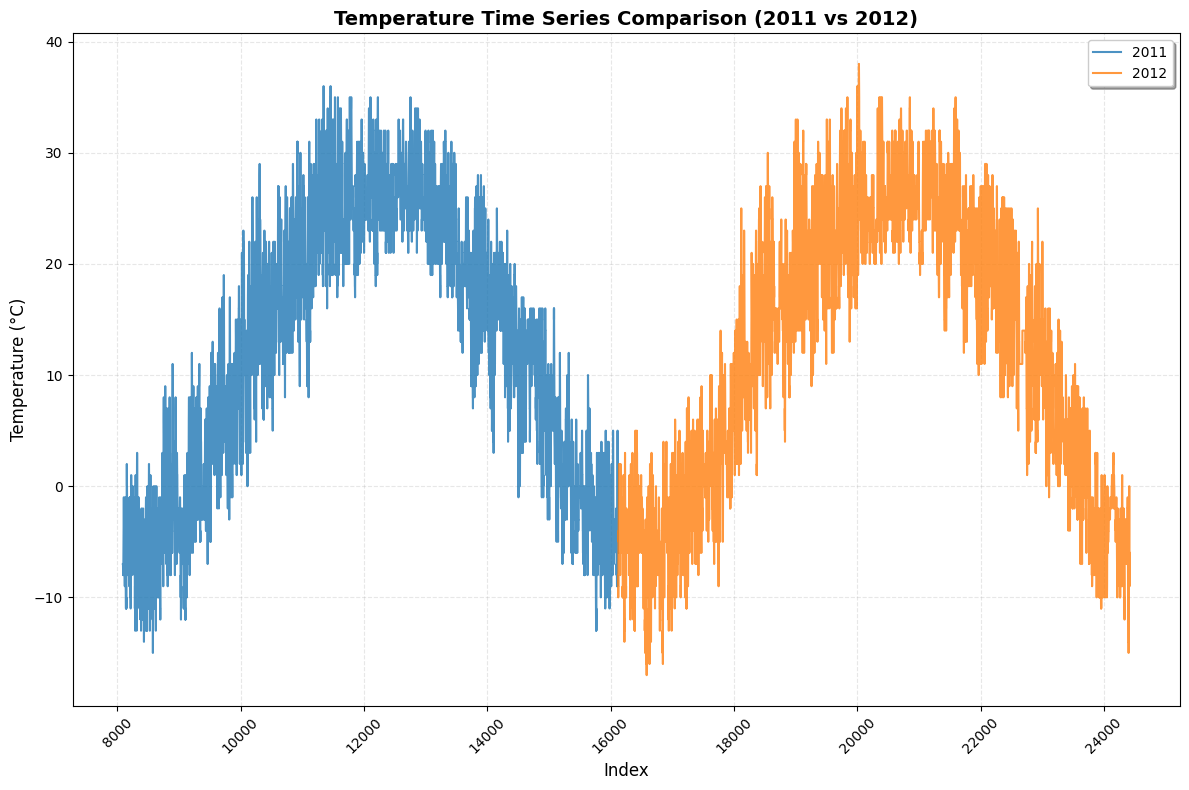

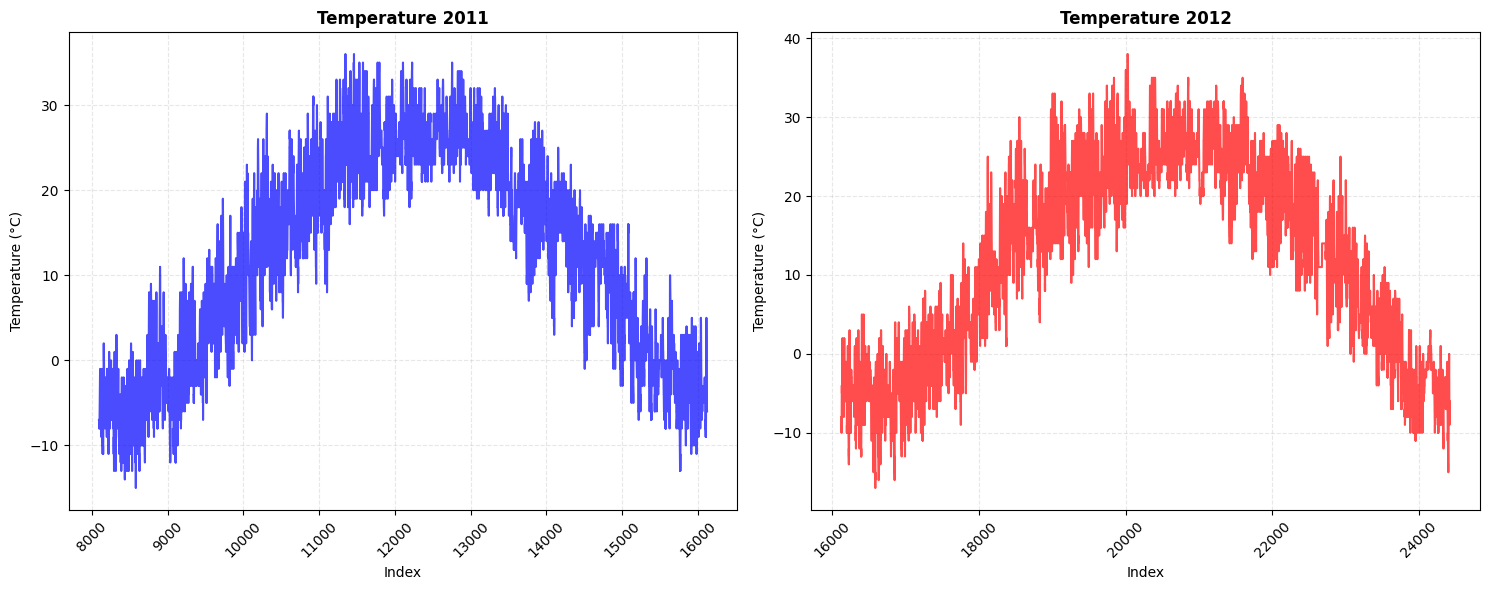

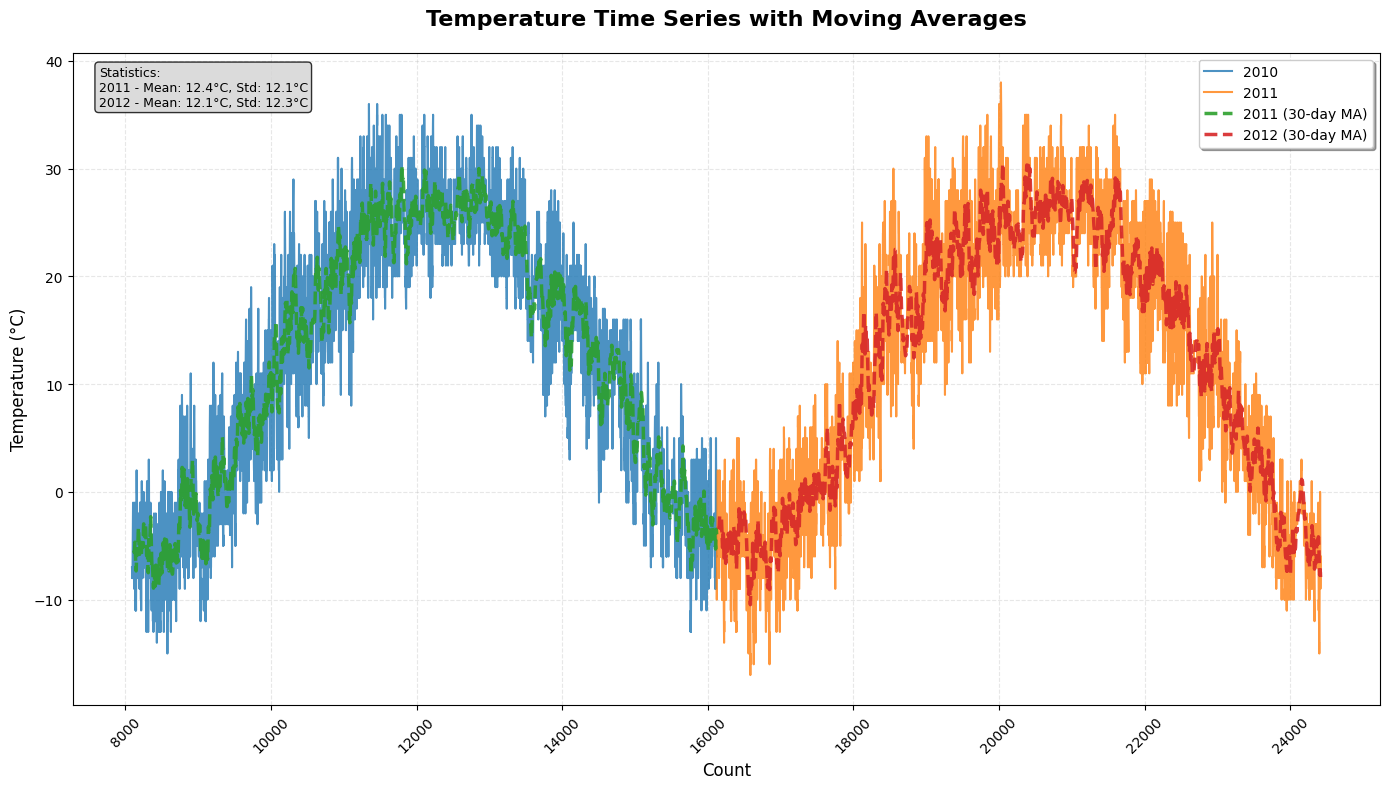

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the data
plt.plot(y_2011.index, y_2011['temperature'], linewidth=1.5, label='2011', alpha=0.8)
plt.plot(y_2012.index, y_2012['temperature'], linewidth=1.5, label='2012', alpha=0.8)

# Improve the plot appearance
plt.title('Temperature Time Series Comparison (2011 vs 2012)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Better x-axis formatting
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Proper legend
plt.legend(loc='upper right', frameon=True, shadow=True)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Alternative: Side-by-side subplots for better comparison
plt.figure(figsize=(15, 6))

# First subplot - 2010
plt.subplot(1, 2, 1)
plt.plot(y_2011.index, y_2011['temperature'], linewidth=1.5, color='blue', alpha=0.7)
plt.title('Temperature 2011', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Second subplot - 2011
plt.subplot(1, 2, 2)
plt.plot(y_2012.index, y_2012['temperature'], linewidth=1.5, color='red', alpha=0.7)
plt.title('Temperature 2012', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Advanced version with statistics
plt.figure(figsize=(14, 8))

# Main plot
plt.plot(y_2011.index, y_2011['temperature'], linewidth=1.5, label='2010', alpha=0.8)
plt.plot(y_2012.index, y_2012['temperature'], linewidth=1.5, label='2011', alpha=0.8)

# Add moving averages for trend visualization
window_size = 30  # 30-day moving average
if len(y_2011) >= window_size:
    ma_2011 = y_2011['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2011.index, ma_2011, linewidth=2.5, linestyle='--', 
             label='2011 (30-day MA)', alpha=0.9)

if len(y_2012) >= window_size:
    ma_2012 = y_2012['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2012.index, ma_2012, linewidth=2.5, linestyle='--', 
             label='2012 (30-day MA)', alpha=0.9)

# Enhanced styling
plt.title('Temperature Time Series with Moving Averages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper right', frameon=True, shadow=True, fontsize=10)

# Add statistical info as text
stats_text = f"""Statistics:
2011 - Mean: {y_2011['temperature'].mean():.1f}°C, Std: {y_2011['temperature'].std():.1f}°C
2012 - Mean: {y_2012['temperature'].mean():.1f}°C, Std: {y_2012['temperature'].std():.1f}°C"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         fontsize=9)

plt.tight_layout()
plt.show()

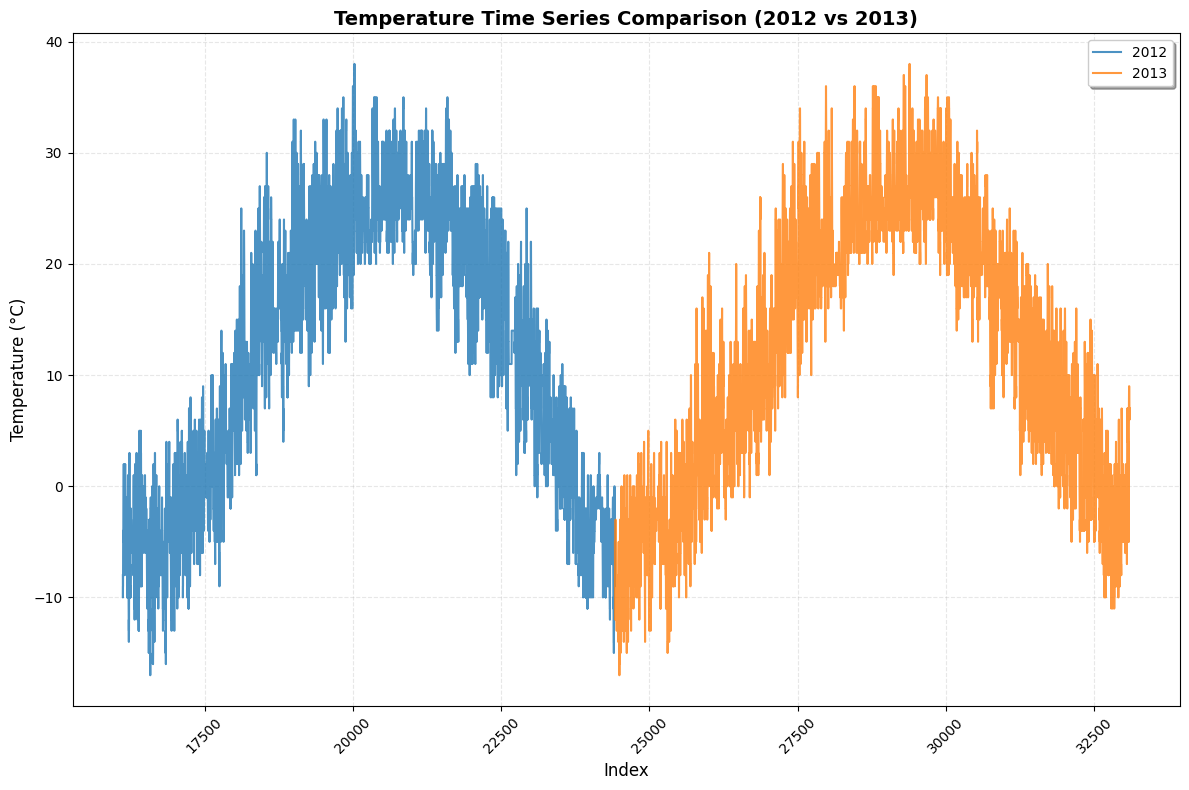

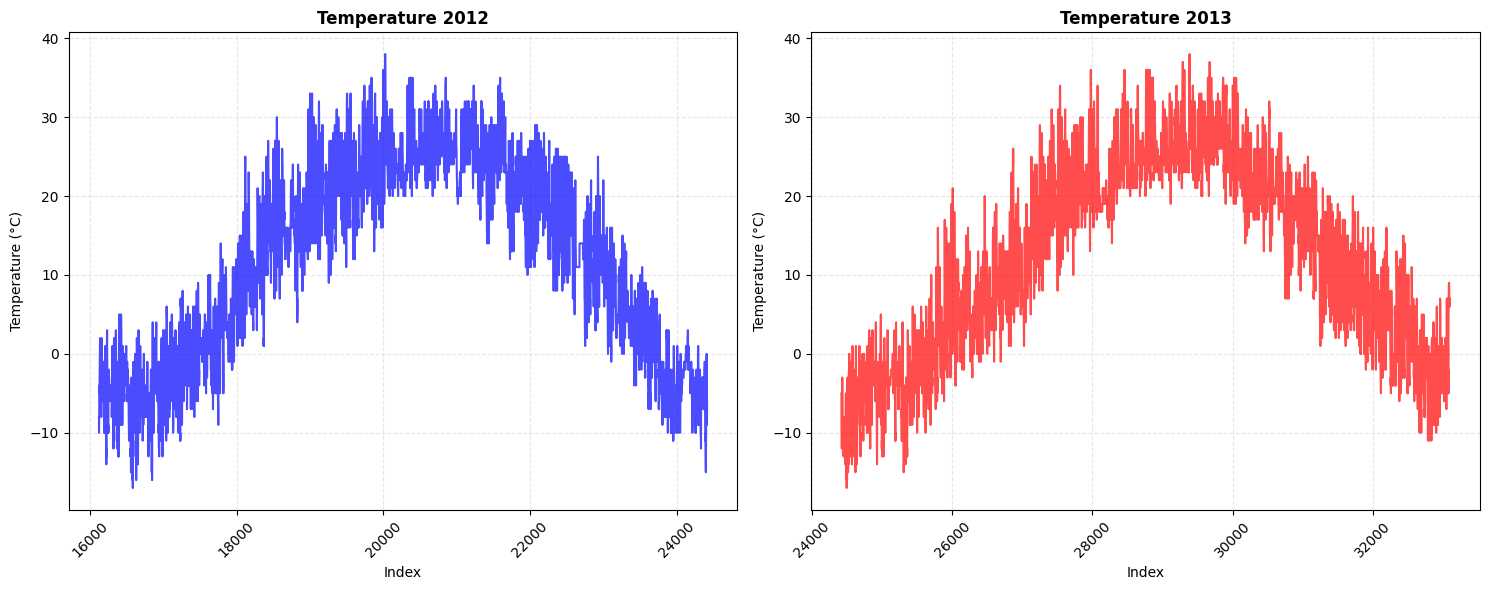

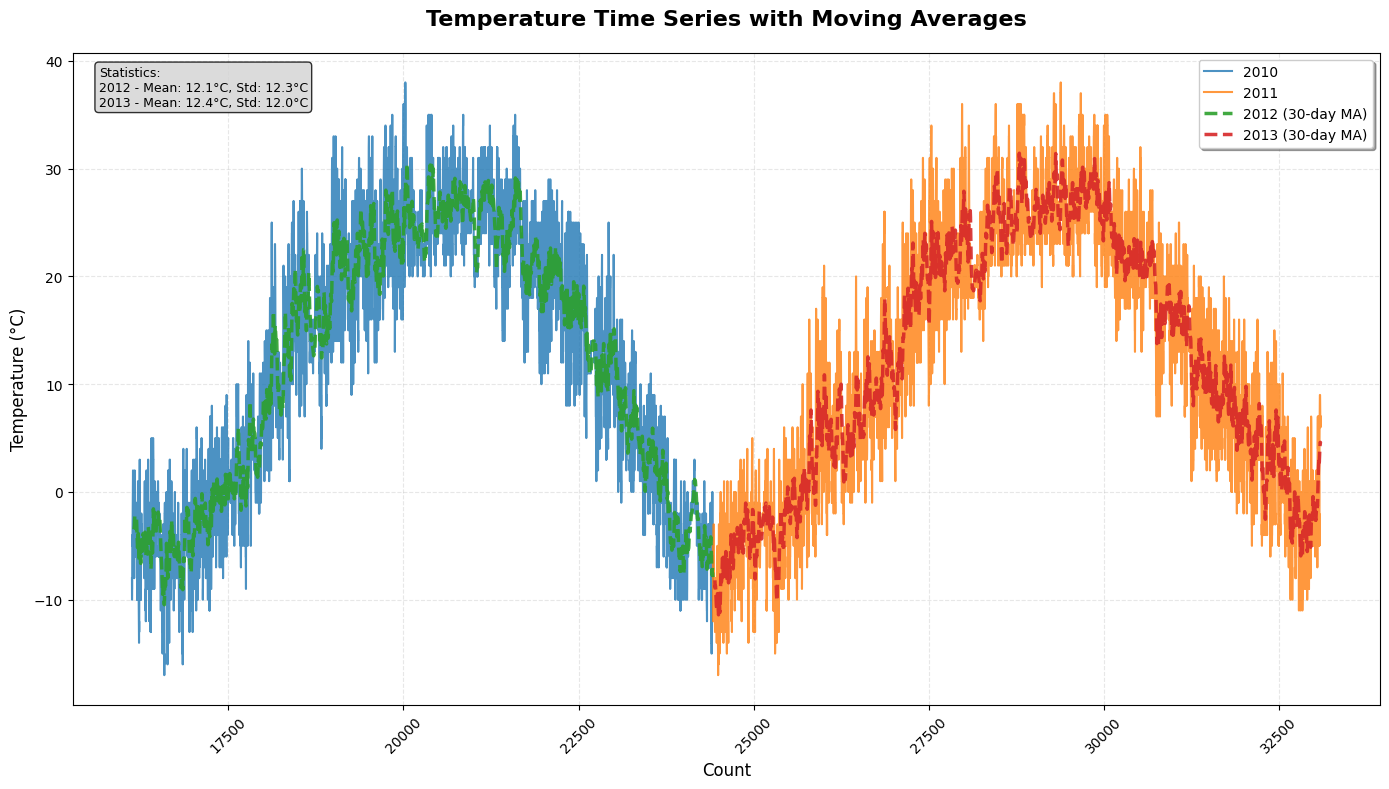

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the data
plt.plot(y_2012.index, y_2012['temperature'], linewidth=1.5, label='2012', alpha=0.8)
plt.plot(y_2013.index, y_2013['temperature'], linewidth=1.5, label='2013', alpha=0.8)

# Improve the plot appearance
plt.title('Temperature Time Series Comparison (2012 vs 2013)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Better x-axis formatting
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Proper legend
plt.legend(loc='upper right', frameon=True, shadow=True)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Alternative: Side-by-side subplots for better comparison
plt.figure(figsize=(15, 6))

# First subplot - 2010
plt.subplot(1, 2, 1)
plt.plot(y_2012.index, y_2012['temperature'], linewidth=1.5, color='blue', alpha=0.7)
plt.title('Temperature 2012', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Second subplot - 2011
plt.subplot(1, 2, 2)
plt.plot(y_2013.index, y_2013['temperature'], linewidth=1.5, color='red', alpha=0.7)
plt.title('Temperature 2013', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Advanced version with statistics
plt.figure(figsize=(14, 8))

# Main plot
plt.plot(y_2012.index, y_2012['temperature'], linewidth=1.5, label='2010', alpha=0.8)
plt.plot(y_2013.index, y_2013['temperature'], linewidth=1.5, label='2011', alpha=0.8)

# Add moving averages for trend visualization
window_size = 30  # 30-day moving average
if len(y_2012) >= window_size:
    ma_2012 = y_2012['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2012.index, ma_2012, linewidth=2.5, linestyle='--', 
             label='2012 (30-day MA)', alpha=0.9)

if len(y_2013) >= window_size:
    ma_2013 = y_2013['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2013.index, ma_2013, linewidth=2.5, linestyle='--', 
             label='2013 (30-day MA)', alpha=0.9)

# Enhanced styling
plt.title('Temperature Time Series with Moving Averages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper right', frameon=True, shadow=True, fontsize=10)

# Add statistical info as text
stats_text = f"""Statistics:
2012 - Mean: {y_2012['temperature'].mean():.1f}°C, Std: {y_2012['temperature'].std():.1f}°C
2013 - Mean: {y_2013['temperature'].mean():.1f}°C, Std: {y_2013['temperature'].std():.1f}°C"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         fontsize=9)

plt.tight_layout()
plt.show()

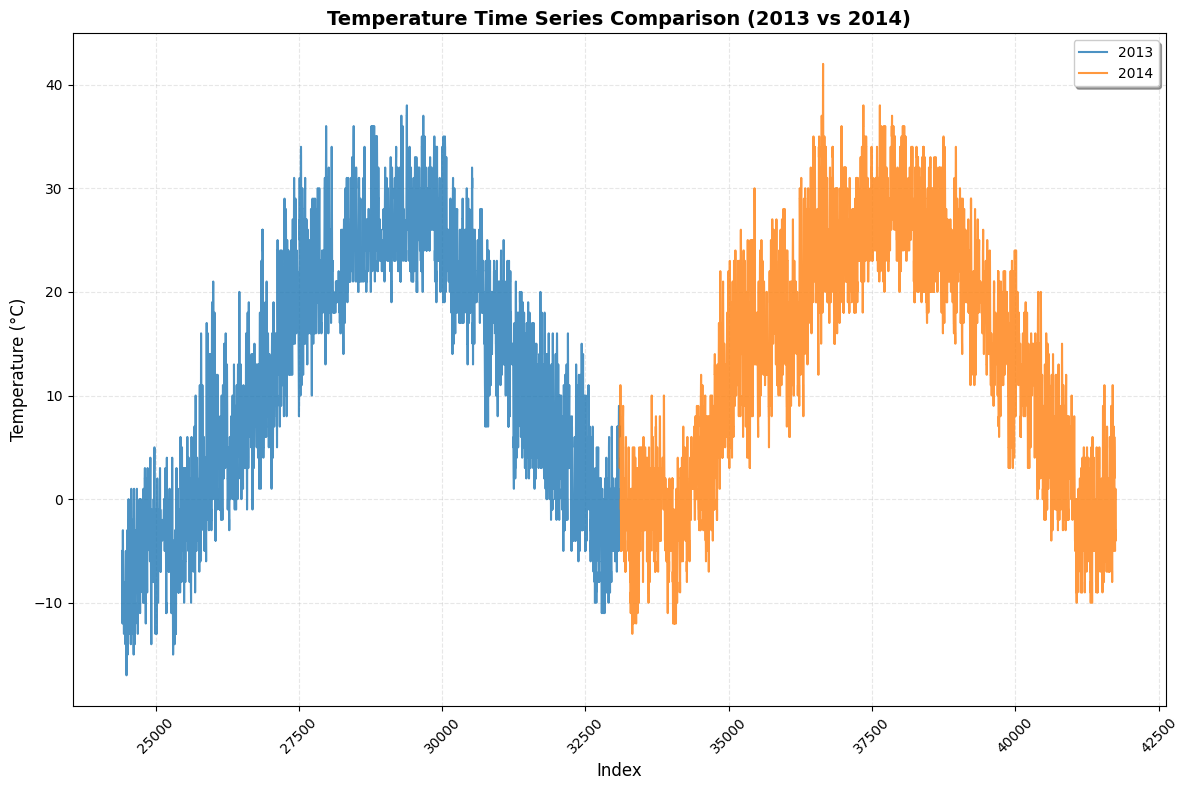

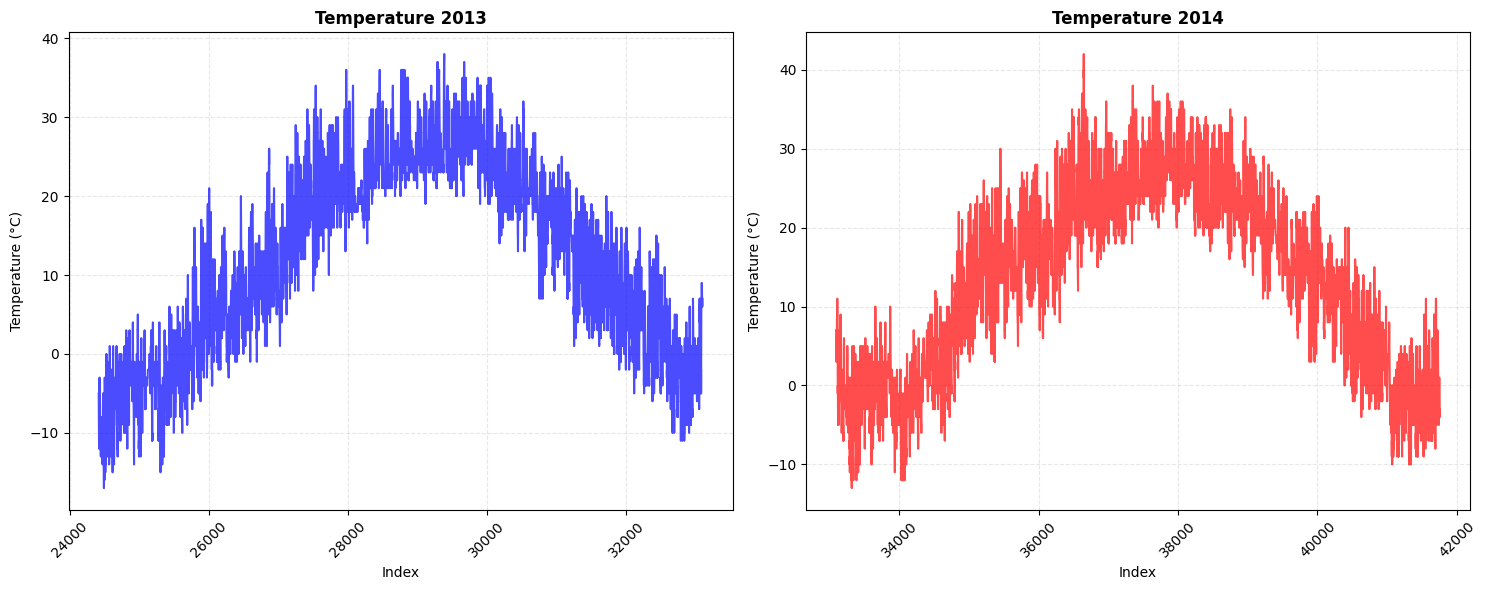

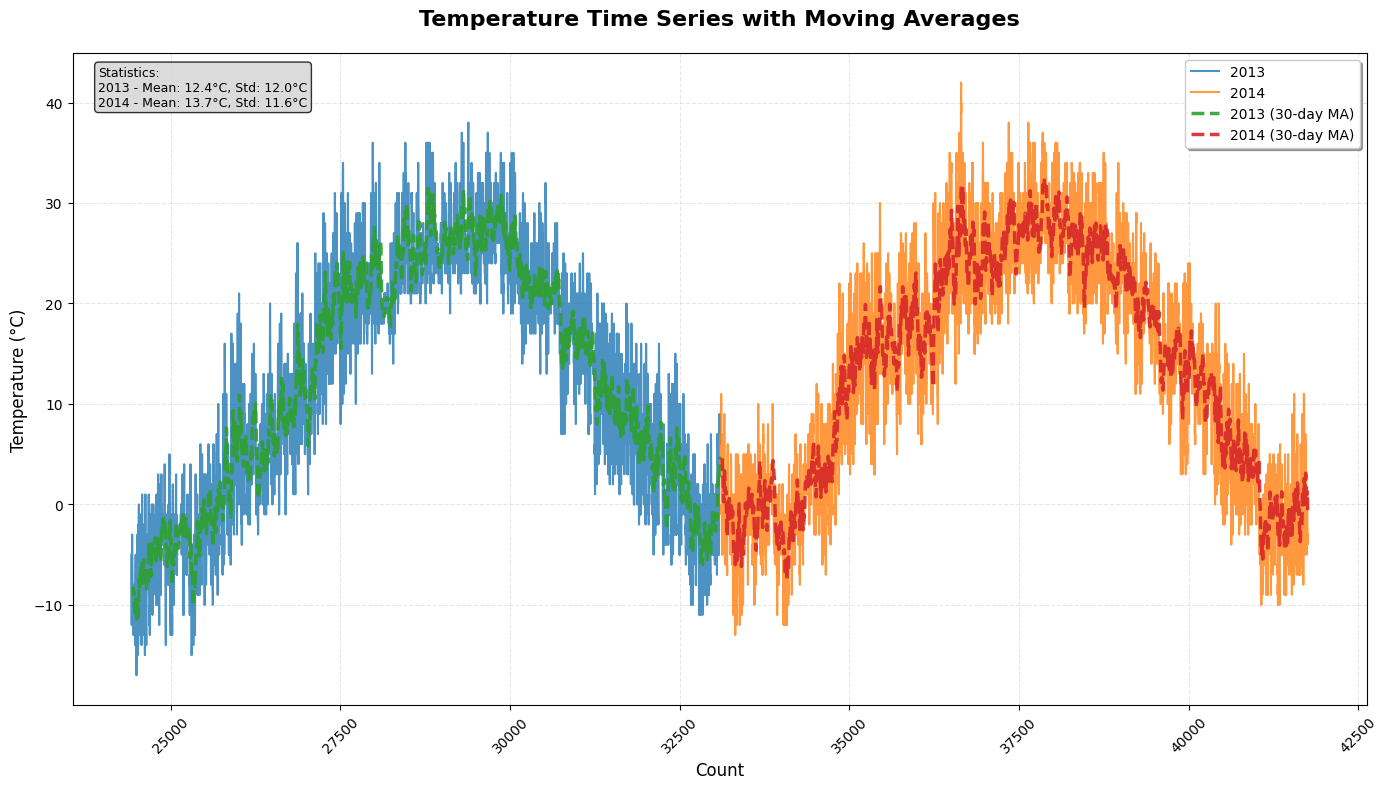

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the data
plt.plot(y_2013.index, y_2013['temperature'], linewidth=1.5, label='2013', alpha=0.8)
plt.plot(y_2014.index, y_2014['temperature'], linewidth=1.5, label='2014', alpha=0.8)

# Improve the plot appearance
plt.title('Temperature Time Series Comparison (2013 vs 2014)', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Better x-axis formatting
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Proper legend
plt.legend(loc='upper right', frameon=True, shadow=True)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Alternative: Side-by-side subplots for better comparison
plt.figure(figsize=(15, 6))

# First subplot - 2010
plt.subplot(1, 2, 1)
plt.plot(y_2013.index, y_2013['temperature'], linewidth=1.5, color='blue', alpha=0.7)
plt.title('Temperature 2013', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# Second subplot - 2011
plt.subplot(1, 2, 2)
plt.plot(y_2014.index, y_2014['temperature'], linewidth=1.5, color='red', alpha=0.7)
plt.title('Temperature 2014', fontsize=12, fontweight='bold')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Advanced version with statistics
plt.figure(figsize=(14, 8))

# Main plot
plt.plot(y_2013.index, y_2013['temperature'], linewidth=1.5, label='2013', alpha=0.8)
plt.plot(y_2014.index, y_2014['temperature'], linewidth=1.5, label='2014', alpha=0.8)

# Add moving averages for trend visualization
window_size = 30  # 30-day moving average
if len(y_2013) >= window_size:
    ma_2013 = y_2013['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2013.index, ma_2013, linewidth=2.5, linestyle='--', 
             label='2013 (30-day MA)', alpha=0.9)

if len(y_2014) >= window_size:
    ma_2014 = y_2014['temperature'].rolling(window=window_size).mean()
    plt.plot(y_2014.index, ma_2014, linewidth=2.5, linestyle='--', 
             label='2014 (30-day MA)', alpha=0.9)

# Enhanced styling
plt.title('Temperature Time Series with Moving Averages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='upper right', frameon=True, shadow=True, fontsize=10)

# Add statistical info as text
stats_text = f"""Statistics:
2013 - Mean: {y_2013['temperature'].mean():.1f}°C, Std: {y_2013['temperature'].std():.1f}°C
2014 - Mean: {y_2014['temperature'].mean():.1f}°C, Std: {y_2014['temperature'].std():.1f}°C"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         fontsize=9)

plt.tight_layout()
plt.show()

In [90]:
df.groupby(['year','month'])[['temperature']].max()

temperature
year month             
2010 1              8.0
     2             14.0
     3             16.0
     4             25.0
     5             35.0
     6             35.0
     7             41.0
     8             34.0
     9             34.0
     10            26.0
     11            21.0
     12            13.0
2011 1              8.0
     2             12.0
     3             23.0
     4             29.0
     5             33.0
     6             36.0
     7             35.0
     8             34.0
     9             31.0
     10            25.0
     11            16.0
     12            10.0
2012 1              5.0
     2              9.0
     3             25.0
     4             30.0
     5             33.0
     6             38.0
     7             35.0
     8             35.0
     9             30.0
     10            26.0
     11            16.0
     12             3.0
2013 1              5.0
     2             16.0
     3             21.0
     4             29.0
     5             36.0
     6             36.0
     7             38.0
     8             37.0
     9             32.0
     10            25.0
     11            20.0
     12            15.0
2014 1             11.0
     2             10.0
     3             26.0
     4             30.0
     5             42.0
     6             38.0
     7             38.0
     8             35.0
     9             34.0
     10            24.0
     11            20.0
     12            11.0

In [93]:
print(f"On May of 2014 was the year with the highest temperature with a Max temperature of {df['temperature'].max()} Farenheit")

On May of 2014 was the year with the highest temperature with a Max temperature of 42.0 Farenheit


In [91]:
df.groupby(['year','month'])[['temperature']].min()

temperature
year month             
2010 1            -19.0
     2            -15.0
     3             -9.0
     4             -1.0
     5              8.0
     6             15.0
     7             20.0
     8             16.0
     9             13.0
     10            -2.0
     11            -7.0
     12           -13.0
2011 1            -15.0
     2            -12.0
     3             -7.0
     4              0.0
     5              8.0
     6             16.0
     7             18.0
     8             17.0
     9              7.0
     10            -1.0
     11            -7.0
     12           -13.0
2012 1            -17.0
     2            -16.0
     3             -9.0
     4              1.0
     5              9.0
     6             13.0
     7             19.0
     8             14.0
     9              8.0
     10             0.0
     11            -7.0
     12           -15.0
2013 1            -17.0
     2            -15.0
     3             -6.0
     4             -1.0
     5              8.0
     6             14.0
     7             19.0
     8             14.0
     9              7.0
     10             1.0
     11            -5.0
     12           -11.0
2014 1            -13.0
     2            -12.0
     3             -7.0
     4              3.0
     5              6.0
     6             15.0
     7             20.0
     8             16.0
     9             10.0
     10             3.0
     11            -4.0
     12           -10.0

In [95]:
print(f"On January of 2010 was the year with the lowest temperature with a Min temperature of {df['temperature'].min()} Farenheit")

On January of 2010 was the year with the lowest temperature with a Min temperature of -19.0 Farenheit


In [96]:
df.groupby(['year','month'])[['temperature']].mean()

temperature
year month             
2010 1        -6.364472
     2        -1.918033
     3         2.983075
     4        10.805014
     5        20.856174
     6        24.458407
     7        27.729839
     8        25.337278
     9        22.224359
     10       12.280323
     11        3.289157
     12       -2.064516
2011 1        -5.543155
     2        -0.854167
     3         6.993600
     4        14.684701
     5        20.730337
     6        25.630098
     7        26.464238
     8        25.657895
     9        19.223922
     10       13.214286
     11        5.946853
     12       -2.308210
2012 1        -4.943284
     2        -2.584058
     3         5.066216
     4        15.463143
     5        21.930535
     6        24.334746
     7        26.568314
     8        25.542536
     9        20.119048
     10       13.306757
     11        3.687679
     12       -4.366450
2013 1        -5.381597
     2        -1.825633
     3         5.397835
     4        12.232168
     5        21.482806
     6        23.658774
     7        27.055631
     8        26.580952
     9        20.121339
     10       12.762873
     11        5.922006
     12       -0.342541
2014 1        -0.910448
     2        -0.711510
     3         9.547779
     4        16.818689
     5        21.594340
     6        24.918919
     7        28.004071
     8        25.750341
     9        20.524476
     10       13.336474
     11        5.766289
     12       -1.370112

In [97]:
df.groupby(['year','month'])[['temperature']].std()

temperature
year month             
2010 1         5.768975
     2         4.861130
     3         5.025331
     4         5.036090
     5         5.405406
     6         4.298332
     7         4.345555
     8         3.584555
     9         4.666947
     10        5.581163
     11        5.234830
     12        5.266633
2011 1         4.023172
     2         4.890410
     3         5.316275
     4         5.233557
     5         5.149553
     6         4.504726
     7         3.261218
     8         3.584356
     9         4.834150
     10        5.073078
     11        5.574298
     12        4.035626
2012 1         4.067047
     2         4.709504
     3         5.972621
     4         5.274469
     5         5.316186
     6         4.470501
     7         3.376602
     8         4.113858
     9         4.617924
     10        5.377416
     11        4.532034
     12        3.389011
2013 1         4.229909
     2         4.968347
     3         4.858295
     4         5.838328
     5         5.198211
     6         4.325559
     7         3.863626
     8         4.146325
     9         4.393756
     10        5.318295
     11        5.306194
     12        5.271738
2014 1         4.669526
     2         4.445835
     3         6.952288
     4         5.346699
     5         6.899598
     6         4.738516
     7         3.853814
     8         4.421030
     9         4.401477
     10        4.332209
     11        5.018923
     12        4.218660

In [98]:
df.groupby(['year','month'])[['temperature']].median()

temperature
year month             
2010 1             -6.0
     2             -2.0
     3              3.0
     4             10.5
     5             20.0
     6             24.0
     7             27.0
     8             25.0
     9             22.0
     10            12.0
     11             3.0
     12            -3.0
2011 1             -6.0
     2             -2.0
     3              7.0
     4             15.0
     5             21.0
     6             25.0
     7             26.0
     8             25.0
     9             19.0
     10            14.0
     11             6.0
     12            -2.0
2012 1             -5.0
     2             -3.0
     3              4.0
     4             15.0
     5             22.0
     6             24.0
     7             26.0
     8             26.0
     9             20.0
     10            13.0
     11             4.0
     12            -4.0
2013 1             -5.0
     2             -2.0
     3              5.0
     4             12.0
     5             21.0
     6             23.0
     7             26.0
     8             26.0
     9             20.0
     10            14.0
     11             6.0
     12            -1.0
2014 1             -1.0
     2              0.0
     3              9.0
     4             17.0
     5             21.0
     6             25.0
     7             28.0
     8             26.0
     9             20.0
     10            13.0
     11             5.0
     12            -2.0